# Import library and read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

# Dataset 1

## Data types check

In [3]:
# change the 'time' to datetime 
datetime_cols = ['start_time', 'rat_period_start', 'rat_period_end', 'sunset_time']
for col in datetime_cols:
    df1[col] = pd.to_datetime(df1[col], format="%d/%m/%Y %H:%M", errors='coerce')

# change 'habit' to a categorical type
df1['habit'] = df1['habit'].astype('category')

df1.dtypes

start_time                   datetime64[ns]
bat_landing_to_food                 float64
habit                              category
rat_period_start             datetime64[ns]
rat_period_end               datetime64[ns]
seconds_after_rat_arrival             int64
risk                                  int64
reward                                int64
month                                 int64
sunset_time                  datetime64[ns]
hours_after_sunset                  float64
season                                int64
dtype: object

## Feature engineering - add rat_duration_seconds (end - start)

In [4]:
# Create the new column using DataFrame variable
df1['rat_duration_seconds'] = (df1['rat_period_end'] - df1['rat_period_start']).dt.total_seconds()

# Display the first 5 rows to check the result
print(df1[['rat_period_start', 'rat_period_end', 'rat_duration_seconds']].head())

     rat_period_start      rat_period_end  rat_duration_seconds
0 2017-12-30 18:35:00 2017-12-30 18:38:00                 180.0
1 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0
2 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0
3 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0
4 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0


## Missing values

In [5]:
df1.isnull().sum()

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
rat_duration_seconds          0
dtype: int64

## Habit column cleaning process

### Fixing typo -> define category -> mapping category (according to the questions)

In [6]:
df1['habit'].unique()

['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', ..., 'bat_fight_and_rat', 'rat_and_rat', 'not_sure_rat', '501.0,358.4,636.2,423.4; 476.0,103.0,634.0,20..., 'rat_and_bat_and_pick']
Length: 82
Categories (81, object): ['157.0,2.6,349.0,159.3; 572.1,275.7,638.3,360.0', '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3', '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,15..., '243.6,235.6,432.2,329.8; 559.0,244.0,622.0,39..., ..., 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']

**description**: The context surrounding the landing event and the animals’ behaviour 

**habit**: Contains 81 behavior types with many rare or inconsistent labels + appear to be coordinates or spatial data that accidentally got included in the habit column --> remove those entries. Most invalid entries are number so I use regex function (first remove whitespace, lowercase for consistency then reject if it has numbers, commas, periods, semicolons, etc then apply it to 'unknown' if it is false)


In [7]:
import re
def is_valid_habit(val):
    if pd.isna(val):
        return False
    # remove whitespace, lowercase
    val = val.strip().lower()
    # reject if it matches pattern of only numbers, commas, periods, semicolons
    if re.fullmatch(r'[\d\.,;\s]+', val):
        return False
    return True

df1['habit'] = df1['habit'].astype(str)
df1['habit'] = df1['habit'].apply(lambda x: x if is_valid_habit(x) else 'unknown')

# convert to category
df1['habit'] = df1['habit'].astype('category')


df1['habit'].dtypes

CategoricalDtype(categories=['all_pick', 'attack_rat', 'bat', 'bat_and_pick',
                  'bat_and_pick_far', 'bat_and_rat', 'bat_fight',
                  'bat_fight_and_pick', 'bat_fight_and_rat', 'bat_fight_rat',
                  'bat_figiht', 'bat_pick', 'bat_pick_rat', 'bat_rat',
                  'bat_rat_pick', 'bats', 'both', 'bowl_out', 'eating',
                  'eating_and_bat_and_pick', 'eating_bat_pick',
                  'eating_bat_rat_pick', 'fast', 'fast_and_pick', 'fast_far',
                  'fight', 'fight_bat', 'fight_rat', 'gaze', 'nan', 'no_food',
                  'not_sure_rat', 'other', 'other directions', 'other_bat',
                  'other_bats', 'other_bats/rat', 'others', 'pick',
                  'pick_and_all', 'pick_and_bat', 'pick_and_others',
                  'pick_and_rat', 'pick_bat', 'pick_bat_rat',
                  'pick_eating_all', 'pick_rat', 'pick_rat_and_bat',
                  'pick_rat_bat', 'pup_and_mon', 'rat', 'rat attack',


In [8]:
# see which values is important 
counts = df1['habit'].value_counts()
filtered_counts = counts[counts == 1]
filtered_counts

habit
eating_bat_pick            1
rat_and_no_food            1
pick_rat_bat               1
pup_and_mon                1
bat_fight_rat              1
rat attack                 1
bat_fight_and_rat          1
rat_and_bat_and_pick       1
bat_fight_and_pick         1
rat_and_others             1
rat_and_rat                1
rat_attack                 1
rat_bat                    1
rat_bat_fight              1
rat_disappear              1
bat_and_pick_far           1
rat_pick_and_bat           1
rat_to_bat                 1
pick_rat_and_bat           1
bat_figiht                 1
pick_eating_all            1
other                      1
eating_and_bat_and_pick    1
fast_and_pick              1
fast_far                   1
fight_bat                  1
gaze                       1
eating                     1
not_sure_rat               1
attack_rat                 1
pick_bat_rat               1
other_bat                  1
bowl_out                   1
other_bats/rat             1
bat_rat_

In [59]:


# Group by the 'habit' column and calculate the mean of 'bat_landing_to_food'
average_time_per_habit = df1.groupby('habit')['bat_landing_to_food'].mean()

# Sort the results to easily see the fastest and slowest habits
sorted_average_time = average_time_per_habit.sort_values()
pd.options.display.max_rows = None
# Print the results
print("Average 'bat_landing_to_food' for each habit:")
print(sorted_average_time)

Average 'bat_landing_to_food' for each habit:
habit
rat_to_bat                  0.010238
rat_attack                  0.075708
attack_rat                  0.085596
rat_pick_and_bat            0.096200
bat_and_pick_far            0.096940
gaze                        1.000000
fast_far                    1.000000
fight                       1.500000
fast                        1.868706
rat_and_no_food             2.000000
not_sure_rat                2.000000
bowl_out                    2.000000
fast_and_pick               2.000000
bat_rat                     3.000000
pup_and_mon                 4.000000
bat_fight_and_pick          4.000000
rat_and_others              5.000000
rat_disappear               5.000000
unknown                     5.025364
nan                         5.152021
no_food                     6.019196
others                      6.615251
bat_pick_rat                7.000000
rat                         7.752477
rat attack                  8.000000
bats                   

In [65]:
def categorize_habit_v2(habit):
    """
    Categorizes habits based on keywords and insights from average landing times.
    """
    if not isinstance(habit, str):
        return 'Unknown'
    
    habit = habit.lower()

    # Category 1: Aggressive Interactions (Keyword is most important)
    if 'fight' in habit or 'attack' in habit or 'rat_to_bat' in habit:
        return 'Aggressive Interactions'
    
    # Category 2: Foraging/Competition (Look for 'pick' or 'fast' with shorter times)
    elif 'fast' in habit or 'pick' in habit: # You might want to refine this!
        return 'Foraging/Competition Behaviors'
        
    # Category 3: Vigilance / Avoidance (Look for passive terms and longer times)
    elif 'gaze' in habit or 'other directions' in habit or 'bat_and_rat' in habit:
        return 'Vigilance / Avoidance'

    # Category 4: Unknown / Other
    elif 'unknown' in habit or 'nan' in habit or 'other' in habit or 'not_sure' in habit:
        return 'Unknown'
        
    # Add more 'elif' conditions here for other cases!
    
    else:
        # If no keywords match, maybe it's just 'Presence Only' or another category
        return 'Presence Only' # This is a default, you can change it

# --- How to use it ---
df1['habit_category'] = df1['habit'].apply(categorize_habit_v2)
print(df1['habit_category'].value_counts())

habit_category
Foraging/Competition Behaviors    483
Presence Only                     288
Unknown                            75
Aggressive Interactions            40
Vigilance / Avoidance              21
Name: count, dtype: int64


**Let's look at the data**
- The context surrounding the landing event and the animals’ behaviour (what's the pdf said)
- In the investigation A questions it said: "Do bats perceive rats not just as competitors for food but also as potential predators? If rats are considered a predation risk by bats, scientists believe that this perception will translate into the bats’ higher level of avoidance behaviour or increased vigilance during foraging on the food platform" --> we stick to this to create our behaviour categories. ("Avoidance" + "Vigilance" vs "Normal Forgaging")
- I first proposed to put any value that has count < 1 to be "other" as it could act as an outlier, etc. But when I look at the data, there are still many values that should be considered. 

**Proposed way to fix**
- Correct typos (bat_figiht --> bat_fight).

- Map all the entries into a clean categories (manually, I also think about using NLP - hierachical clustering to divide them, but it's just cleaning data :v )

**Here's how I divided the data**

- Categories
    - Vigilance / Avoidance
        - High speed (fast), gaze/orientation changes — suggest caution or predator avoidance (bats considered rats as threats).
        - Labels such as: fast, fast_and_pick, fast_far, gaze

    - Foraging/ competitors
        - Any "pick" actions or bat–rat co-occurrence at food sites.
        - Labels: pick, bat_and_pick, rat_and_pick, pick_and_others, pick_and_bat, pick_and_rat, etc
    
    - Aggressive interactions
        - Fighting or attack — may indicate defense (predation risk) or food competition
        - Labels: bat_fight, fight, fight_rat, bat_fight_and_pick.
    - presence only
        - presence of bats/rats without actions — baseline for encounter rate.
        - bat, bats, other_bat, other_bats, rat, not_sure_rat, bat_and_rat
    - non-foraging/non-aggressive
        - No food or unclear activity — may link to seasonal scarcity.
        - no_food, rat_and_no_food, rat_disappear
    - Unknown
        - Vague, rare, or irrelevant labels.
        - nan, unknown, other, others, both, all_pick, bowl_out, pup_and_mon, other directions, rat_and_rat, rat_to_bat


In [10]:
# let's categorize it first
# replace the typo 
df1['habit'] = df1['habit'].replace('bat_figiht', 'bat_fight')


# Define categories
categories = {
    'Vigilance/Avoidance Behaviors': [],
    'Foraging/Competition Behaviors': [],
    'Aggressive Interactions': [],
    'Presence Only': [],
    'Non-Foraging/Non-Aggressive': [],
    'Unknown': []
}



labels, counts = np.unique(df1['habit'].values, return_counts=True)
value_counts = dict(zip(labels, counts))

# Categorize labels
for label in labels:
    count = value_counts.get(label, 1)
    if any(x in label for x in ['fast', 'gaze']):
        categories['Vigilance/Avoidance Behaviors'].append((label, count))
    elif 'pick' in label or 'eating' in label:
        categories['Foraging/Competition Behaviors'].append((label, count))
    elif any(x in label for x in ['fight', 'attack']):
        categories['Aggressive Interactions'].append((label, count))
    elif any(x in label for x in ['bat', 'bats', 'rat']) and 'pick' not in label and 'fight' not in label and 'attack' not in label and 'eating' not in label:
        categories['Presence Only'].append((label, count))
    elif any(x in label for x in ['no_food', 'disappear']):
        categories['Non-Foraging/Non-Aggressive'].append((label, count))
    else:
        categories['Unknown'].append((label, count))


#write some summary
category_summary = {}
for category, items in categories.items():
    total_count = sum(count for _, count in items)
    category_summary[category] = {'labels': items, 'total_count': total_count}

# output results
for category, data in category_summary.items():
    print(f"\n{category}(Total Count:{data['total_count']}):")
    for label, count in data['labels']:
        print(f"  - {label}:{count}")


Vigilance/Avoidance Behaviors(Total Count:248):
  - fast:245
  - fast_and_pick:1
  - fast_far:1
  - gaze:1

Foraging/Competition Behaviors(Total Count:238):
  - all_pick:5
  - bat_and_pick:20
  - bat_and_pick_far:1
  - bat_fight_and_pick:1
  - bat_pick:3
  - bat_pick_rat:1
  - bat_rat_pick:1
  - eating:1
  - eating_and_bat_and_pick:1
  - eating_bat_pick:1
  - eating_bat_rat_pick:1
  - pick:139
  - pick_and_all:3
  - pick_and_bat:8
  - pick_and_others:8
  - pick_and_rat:6
  - pick_bat:6
  - pick_bat_rat:1
  - pick_eating_all:1
  - pick_rat:4
  - pick_rat_and_bat:1
  - pick_rat_bat:1
  - rat_and_bat_and_pick:1
  - rat_and_pick:8
  - rat_pick:14
  - rat_pick_and_bat:1

Aggressive Interactions(Total Count:38):
  - attack_rat:1
  - bat_fight:27
  - bat_fight_and_rat:1
  - bat_fight_rat:1
  - fight:2
  - fight_bat:1
  - fight_rat:2
  - rat attack:1
  - rat_attack:1
  - rat_bat_fight:1

Presence Only(Total Count:308):
  - bat:30
  - bat_and_rat:19
  - bat_rat:1
  - bats:7
  - not_sure_rat:1


In [11]:
# map the data
def map_to_category(label):
    label = str(label).lower()
    if any(x in label for x in ['fast', 'gaze']):
        return 'Vigilance/Avoidance Behaviors'
    elif 'pick' in label or 'eating' in label:
        return 'Foraging/Competition Behaviors'
    elif any(x in label for x in ['fight', 'attack']):
        return 'Aggressive Interactions'
    elif any(x in label for x in ['bat', 'bats', 'rat']) and all(x not in label for x in ['pick', 'fight', 'attack', 'eating']):
        return 'Presence Only'
    elif any(x in label for x in ['no_food', 'disappear']):
        return 'Non-Foraging/Non-Aggressive'
    else:
        return 'Unknown'

# Apply the mapping to create a new column
df1['habit_category'] = df1['habit'].apply(map_to_category)

df1['habit_category'].value_counts()

habit_category
Presence Only                     308
Vigilance/Avoidance Behaviors     248
Foraging/Competition Behaviors    238
Unknown                            71
Aggressive Interactions            38
Non-Foraging/Non-Aggressive         4
Name: count, dtype: int64

## Data types check again

In [12]:
df1['risk'] = df1['risk'].astype('category')
df1['reward'] = df1['reward'].astype('category')
df1['season'] = df1['season'].astype('category')
df1['month'] = df1['month'].astype('category')

In [13]:
#identify numerical columns
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

print(num_cols)

#know the range
df1[num_cols].describe()

Index(['bat_landing_to_food', 'seconds_after_rat_arrival',
       'hours_after_sunset', 'rat_duration_seconds'],
      dtype='object')


,bat_landing_to_food,seconds_after_rat_arrival,hours_after_sunset,rat_duration_seconds
count,907.000000,907.000000,907.000000,907.000000
mean,11.713134,282.877619,5.531863,550.782800
std,27.644410,240.974918,2.414146,375.302298
min,0.010238,0.000000,-0.261667,0.000000
25%,1.000000,89.500000,3.779028,240.000000
50%,4.000000,206.000000,5.622778,540.000000
75%,11.500000,446.500000,7.402778,780.000000
max,443.000000,949.000000,12.091944,3540.000000


## Outliers

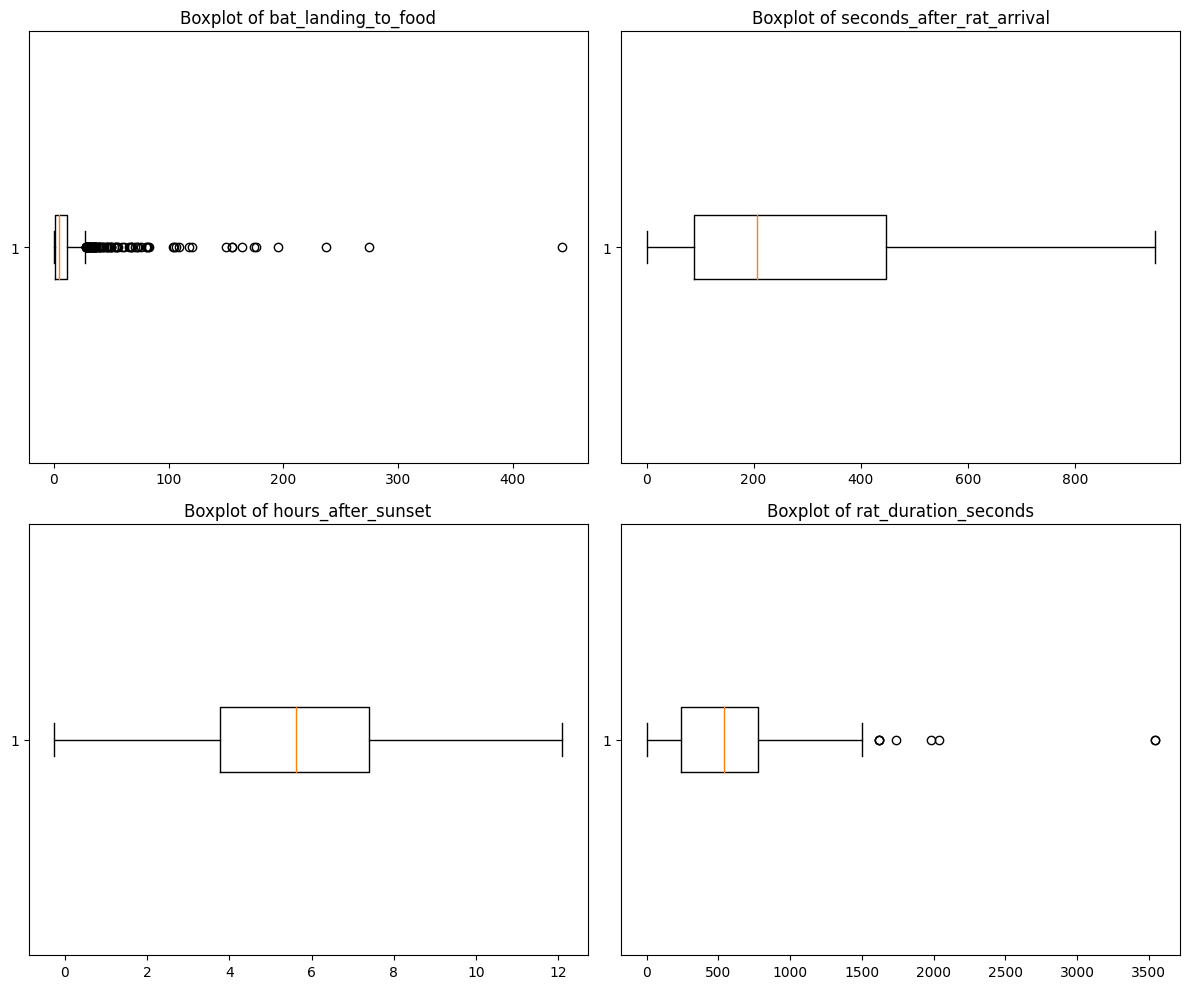

In [14]:
num_cols = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset', 'rat_duration_seconds']

plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)  
    plt.boxplot(df1[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [15]:
# Initialize dictionary for column-specific bounds
bounds = {}
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    bounds[col] = {'lower': lower_bound, 'upper': upper_bound}

# Cap each column with its own bounds
df1['bat_landing_to_food'] = df1['bat_landing_to_food'].clip(lower=bounds['bat_landing_to_food']['lower'], upper=bounds['bat_landing_to_food']['upper'])
df1['rat_duration_seconds'] = df1['rat_duration_seconds'].clip(lower=bounds['rat_duration_seconds']['lower'], upper=bounds['rat_duration_seconds']['upper'])

bat_landing_to_food: 88 outliers
seconds_after_rat_arrival: 0 outliers
hours_after_sunset: 0 outliers
rat_duration_seconds: 8 outliers


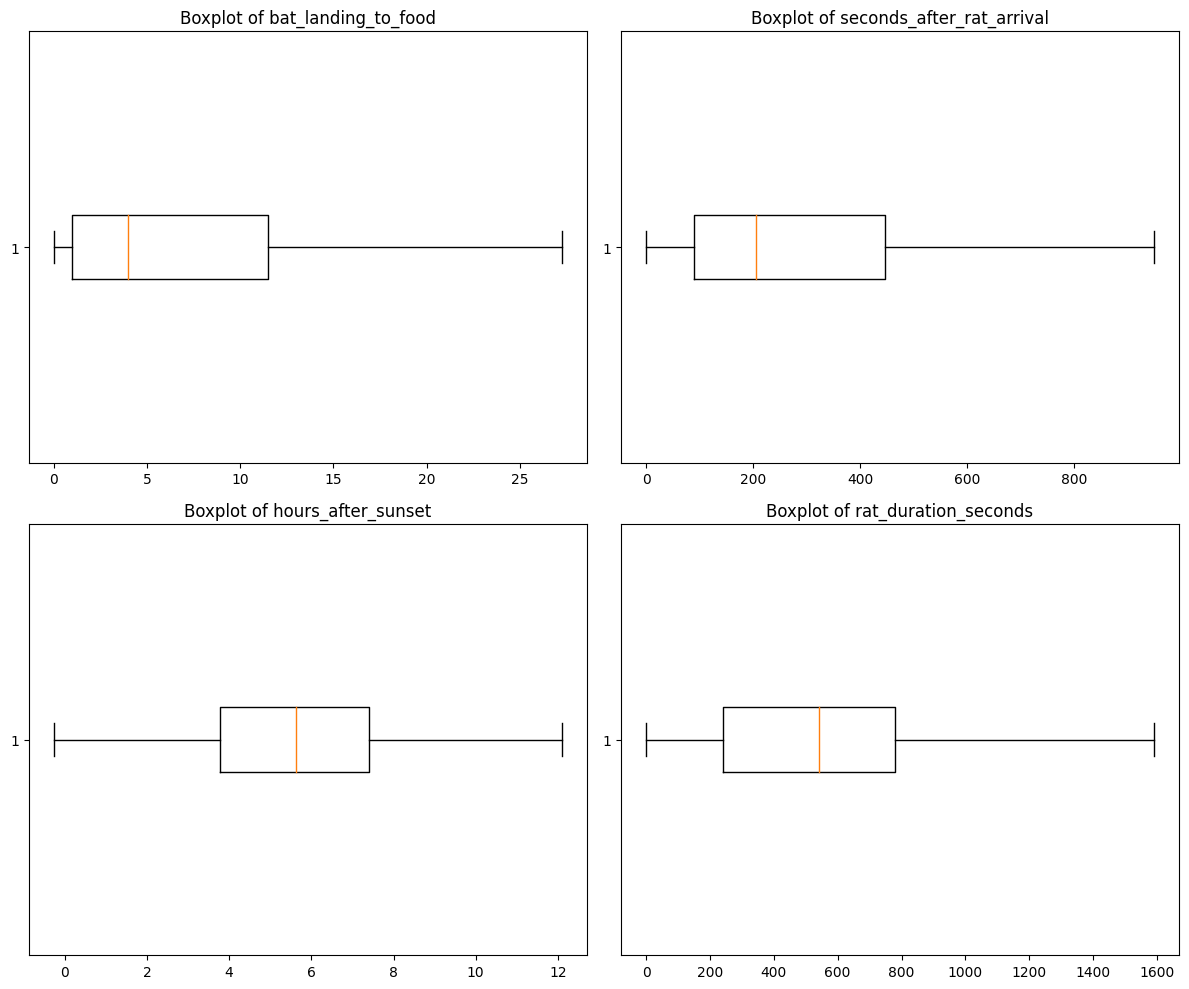

In [16]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)  
    plt.boxplot(df1[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


fixing outliers may affect the result --> no need to clean it

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      907 non-null    category      
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    category      
 7   reward                     907 non-null    category      
 8   month                      907 non-null    category      
 9   sunset_time                907 non-null    datetime64[ns]
 10  hours_after_sunset         907 non-null    float64       
 11  season                     907 non-null    category      
 12  rat_dura

# Dataset 2

In [18]:
df2.dtypes


time                   object
month                   int64
hours_after_sunset    float64
bat_landing_number      int64
food_availability     float64
rat_minutes           float64
rat_arrival_number      int64
dtype: object

In [19]:
df2['time']= pd.to_datetime(df2['time'], format="%d/%m/%Y %H:%M", errors='coerce')
df2['month'] = df2['month'].astype('category')
df2.dtypes

time                  datetime64[ns]
month                       category
hours_after_sunset           float64
bat_landing_number             int64
food_availability            float64
rat_minutes                  float64
rat_arrival_number             int64
dtype: object

In [20]:
df2.isna().sum()

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

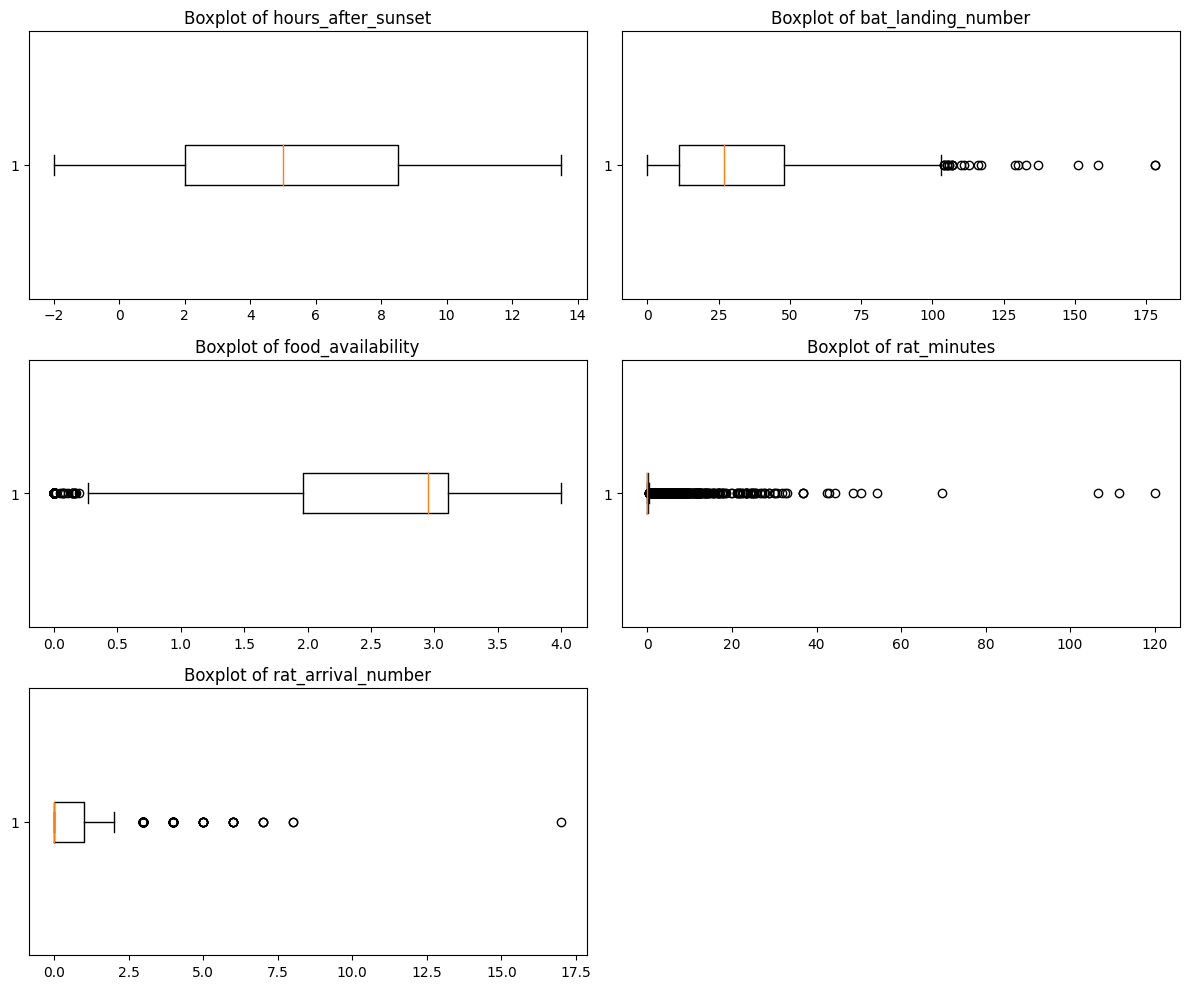

In [21]:
num_cols = ['hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']

plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)  
    plt.boxplot(df2[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [22]:
# Initialize dictionary for column-specific bounds
bounds = {}
for col in num_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    bounds[col] = {'lower': lower_bound, 'upper': upper_bound}

# # Cap each column with its own bounds
df2['bat_landing_number'] = df2['bat_landing_number'].clip(lower=bounds['bat_landing_number']['lower'], upper=bounds['bat_landing_number']['upper'])
df2['food_availability'] = df2['food_availability'].clip(lower=bounds['food_availability']['lower'], upper=bounds['food_availability']['upper'])
df2['rat_minutes'] = df2['rat_minutes'].clip(lower=bounds['rat_minutes']['lower'], upper= 30)
df2['rat_arrival_number'] = df2['rat_arrival_number'].clip(lower=bounds['rat_arrival_number']['lower'], upper=bounds['rat_arrival_number']['upper'])

hours_after_sunset: 0 outliers
bat_landing_number: 24 outliers
food_availability: 202 outliers
rat_minutes: 511 outliers
rat_arrival_number: 92 outliers


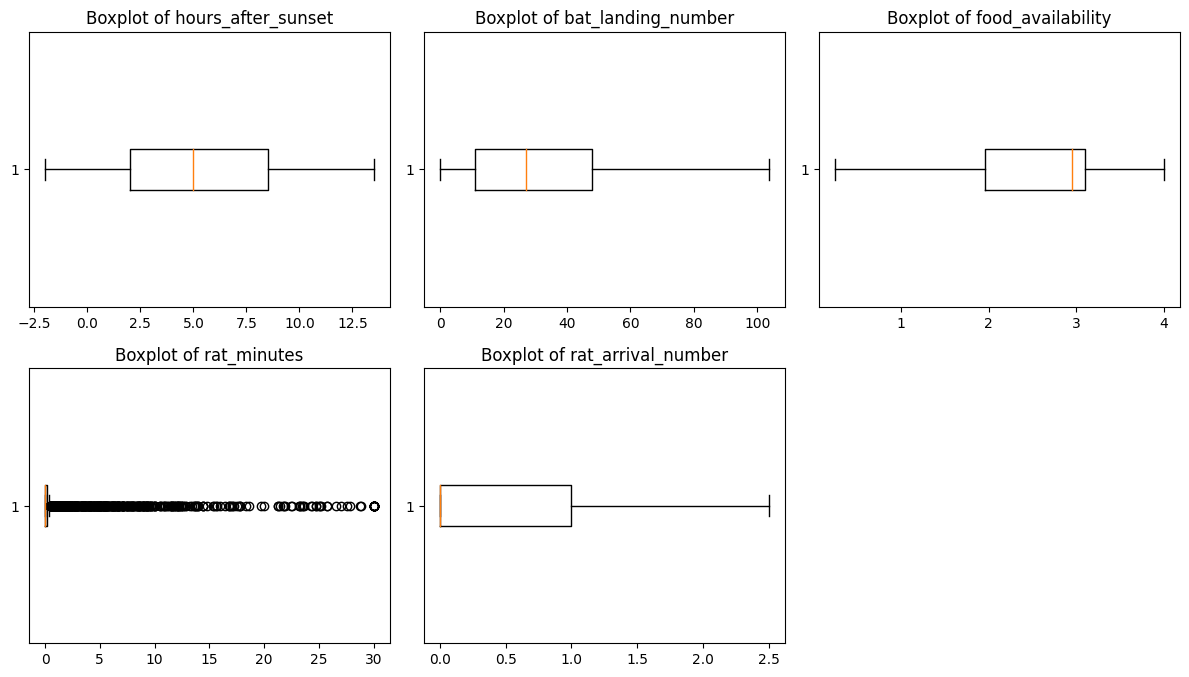

In [23]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)  
    plt.boxplot(df2[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Merging process

In [24]:
df1["month"].unique()

[0, 1, 2, 3, 4, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [25]:
df2["month"].unique()

[0, 1, 2, 3, 4, 5, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

drop month = 6

In [26]:
df2.drop(df2[df2['month'] == 6].index, inplace=True)
df2["month"] = df2["month"].cat.remove_unused_categories()

df2["month"].shape[0]

df2["month"].unique()

[0, 1, 2, 3, 4, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]

#### Add `time_end` for merging with dataset1

In [27]:
df2['time_end'] = df2['time'] + pd.Timedelta(minutes=30)

In [28]:
# Sort both datasets by time to ensure proper matching
df1 = df1.sort_values('start_time')
df2 = df2.sort_values('time')

# Match each landing to the nearest 30-minute period
df_combined = pd.merge_asof(
    df1,
    df2,
    left_on='start_time',
    right_on='time',
    direction='backward',  # Match to the most recent period start
    allow_exact_matches=True
)

# Filter rows where start_time is within the 30-minute window
df_combined = df_combined[
    (df_combined['start_time'] >= df_combined['time']) &
    (df_combined['start_time'] < df_combined['time_end'])
]

In [29]:
# Verify combined dataset
print("\nCombined Dataset Preview:")
print(df_combined.head())


Combined Dataset Preview:
           start_time  bat_landing_to_food habit    rat_period_start  \
0 2017-12-26 20:57:00                  1.0   nan 2017-12-26 20:53:00   
1 2017-12-26 20:57:00                  5.0   nan 2017-12-26 20:53:00   
2 2017-12-26 21:24:00                  3.0  fast 2017-12-26 21:22:00   
3 2017-12-26 21:24:00                 15.0   rat 2017-12-26 21:22:00   
4 2017-12-26 21:24:00                  6.0  pick 2017-12-26 21:22:00   

       rat_period_end  seconds_after_rat_arrival risk reward month_x  \
0 2017-12-26 20:58:00                        239    0      0       0   
1 2017-12-26 20:58:00                        199    0      0       0   
2 2017-12-26 21:27:00                        121    0      1       0   
3 2017-12-26 21:27:00                         88    1      0       0   
4 2017-12-26 21:27:00                        113    0      1       0   

          sunset_time  ...  rat_duration_seconds  \
0 2017-12-26 16:43:00  ...                 300.0   
1 2

In [30]:
# Verify month alignment after standardization
print("\nMismatch in Months After Standardization:")
print(df_combined[df_combined['month_x'] != df_combined['month_y']].shape[0])

# Display mismatched rows for debugging
mismatches = df_combined[df_combined['month_x'] != df_combined['month_y']][
    ['start_time', 'time', 'month_x', 'month_y']
]
print("\nMismatched Rows Sample:")
print(mismatches)


Mismatch in Months After Standardization:
8

Mismatched Rows Sample:
             start_time                time month_x month_y
675 2018-05-01 00:06:00 2018-04-30 23:50:00       5       4
676 2018-05-01 00:06:00 2018-04-30 23:50:00       5       4
677 2018-05-01 00:06:00 2018-04-30 23:50:00       5       4
678 2018-05-01 00:07:00 2018-04-30 23:50:00       5       4
679 2018-05-01 00:07:00 2018-04-30 23:50:00       5       4
680 2018-05-01 00:08:00 2018-04-30 23:50:00       5       4
681 2018-05-01 00:09:00 2018-04-30 23:50:00       5       4
682 2018-05-01 00:09:00 2018-04-30 23:50:00       5       4


-> There are 8 mismatches due to midight boundary (bat landings on 2018-05-01 00:06:00 still macthed to periods starting 2018-04-30 23:50:00 but it will appear in different months)

--> Will ignore this as the data is still correct (landings are within the 30-minute period), and the impact on Investigations A and B is minimal

In [31]:
df_combined.to_csv('df_combined.csv', index= False)

## Check for the combined dataset once again

In [32]:
print(df_combined.shape) 
print(df_combined.columns)
print(df_combined.dtypes)
print(df_combined.isnull().sum())  # Handle missing
df_combined['habit'] = df_combined['habit'].replace('nan', 'unknown')  # Clean habit column
print(df_combined.duplicated().sum())  # Check for duplicates

(907, 22)
Index(['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start',
       'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward',
       'month_x', 'sunset_time', 'hours_after_sunset_x', 'season',
       'rat_duration_seconds', 'habit_category', 'time', 'month_y',
       'hours_after_sunset_y', 'bat_landing_number', 'food_availability',
       'rat_minutes', 'rat_arrival_number', 'time_end'],
      dtype='object')
start_time                   datetime64[ns]
bat_landing_to_food                 float64
habit                              category
rat_period_start             datetime64[ns]
rat_period_end               datetime64[ns]
seconds_after_rat_arrival             int64
risk                               category
reward                             category
month_x                            category
sunset_time                  datetime64[ns]
hours_after_sunset_x                float64
season                             category
rat_duration_seconds         

# Exploratory Data Analysis

## Descriptive Analysis 

### 1.Overall Distributions (Baseline Patterns)

#### Overview stat

In [33]:
print(df_combined.describe())  # Overview

                          start_time  bat_landing_to_food  \
count                            907           907.000000   
mean   2018-04-11 20:41:27.056229120             7.785901   
min              2017-12-26 20:57:00             0.010238   
25%              2018-04-03 23:29:00             1.000000   
50%              2018-04-27 00:28:00             4.000000   
75%              2018-05-01 00:07:30            11.500000   
max              2018-05-31 23:34:00            27.250000   
std                              NaN             8.869074   

                    rat_period_start                 rat_period_end  \
count                            907                            907   
mean   2018-04-11 20:36:43.395810304  2018-04-11 20:45:54.178610944   
min              2017-12-26 20:53:00            2017-12-26 20:58:00   
25%              2018-04-03 23:24:00            2018-04-03 23:40:00   
50%              2018-04-27 00:24:00            2018-04-27 00:28:00   
75%              2018-05

In [34]:
print(df_combined['bat_landing_to_food'].describe())

count    907.000000
mean       7.785901
std        8.869074
min        0.010238
25%        1.000000
50%        4.000000
75%       11.500000
max       27.250000
Name: bat_landing_to_food, dtype: float64


#### histogram for continuous variables

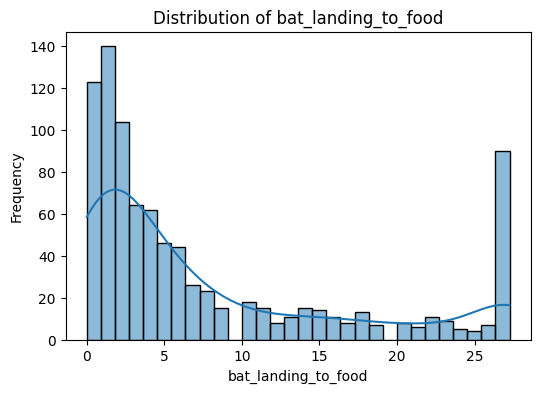

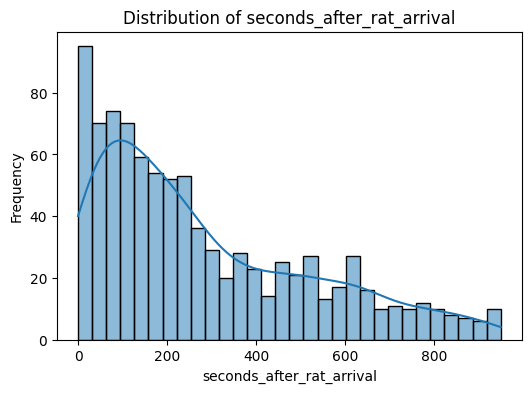

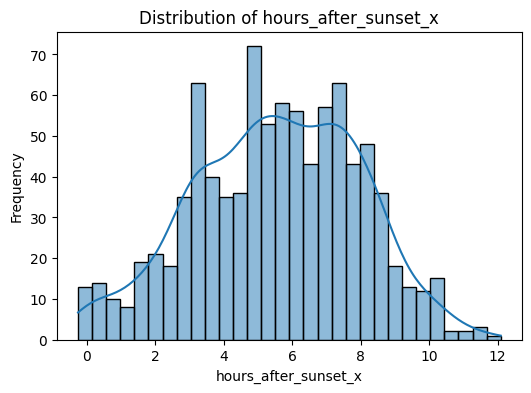

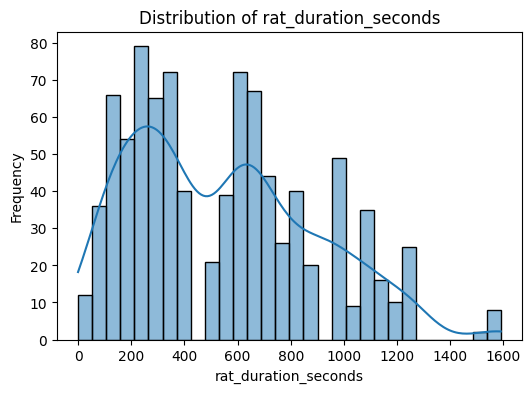

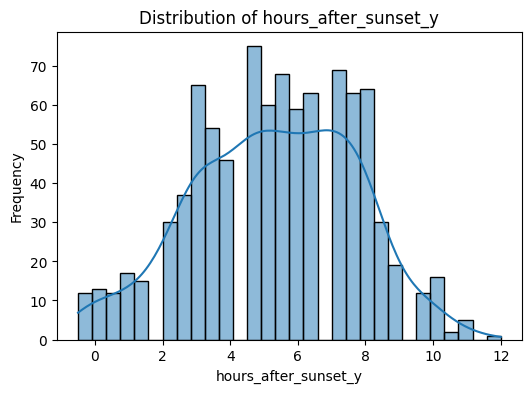

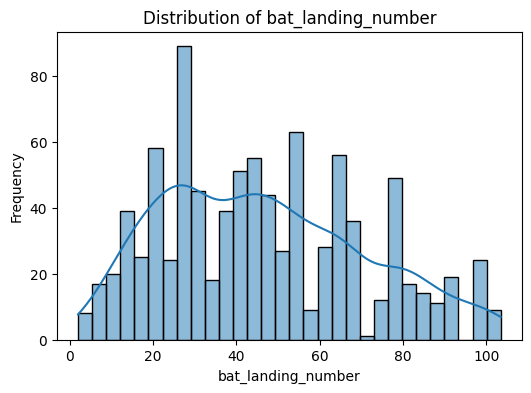

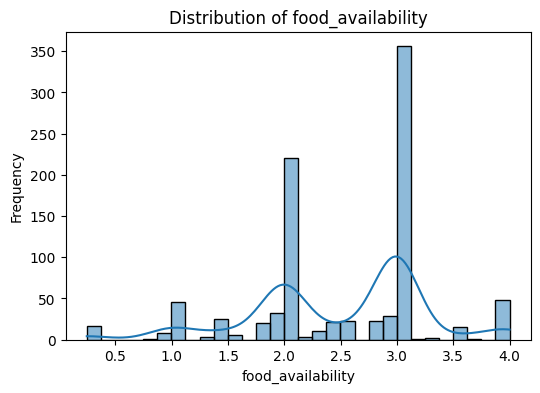

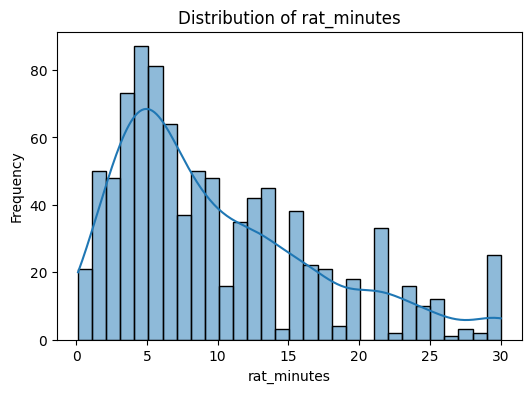

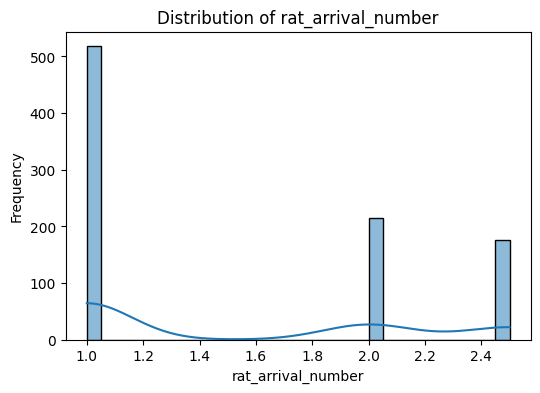

In [35]:
num_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns

#histogram
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_combined[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


bat_landing_to_food is right-skewed --> showing vigilance (try to take the food as fast as possible when they arrived at the platform), when we don't consider the outliers --> highly dispersed

/tmp/ipykernel_654/812995572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='risk', y='bat_landing_to_food', palette='Set2')


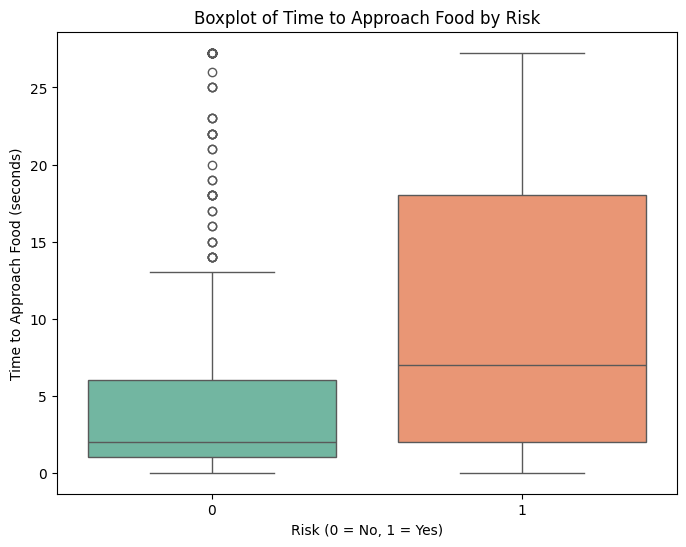

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='risk', y='bat_landing_to_food', palette='Set2')
plt.title('Boxplot of Time to Approach Food by Risk')
plt.xlabel('Risk (0 = No, 1 = Yes)')
plt.ylabel('Time to Approach Food (seconds)')
plt.show()

#### Frequency table for categorical variables

In [37]:
cat_col = ["habit_category", "risk", "reward", "season"]

for var in cat_col:
    counts = df_combined[var].value_counts(dropna=False)
    percentages = df_combined[var].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    
    print(f"\nFrequency Analysis for {var}:")
    print(summary)


Frequency Analysis for habit_category:
                                Count  Percentage
habit_category                                   
Presence Only                     308       33.96
Vigilance/Avoidance Behaviors     248       27.34
Foraging/Competition Behaviors    238       26.24
Unknown                            71        7.83
Aggressive Interactions            38        4.19
Non-Foraging/Non-Aggressive         4        0.44

Frequency Analysis for risk:
      Count  Percentage
risk                   
0       458        50.5
1       449        49.5

Frequency Analysis for reward:
        Count  Percentage
reward                   
1         484       53.36
0         423       46.64

Frequency Analysis for season:
        Count  Percentage
season                   
1         756       83.35
0         151       16.65


### Avoidance and Competition Patterns

#### Correlation heatmap between bat_landing_number, rat_arrival_number, rat_minutes, food_availability.
- Average bat landings: Mean of bat_landing_number.  
- Rat activity: Mean of rat_arrival_number, rat_minutes.  
- Correlations: Between bat_landing_number and rat variables.  


Avg Bat Landings: 45.0
Avg Rat Arrivals: 1.0
Avg Rat Minutes: 7.783333333
                           bat_landing_to_food  seconds_after_rat_arrival  \
bat_landing_to_food                   1.000000                   0.063925   
seconds_after_rat_arrival             0.063925                   1.000000   
risk                                  0.307531                   0.022139   
reward                               -0.055492                  -0.023903   
season                                0.133788                   0.139930   
rat_duration_seconds                  0.050680                   0.627612   
bat_landing_number                   -0.112512                  -0.139427   
food_availability                     0.051858                   0.034197   
rat_minutes                           0.092189                   0.422460   
rat_arrival_number                   -0.009682                  -0.040522   

                               risk    reward    season  rat_duration_seconds 

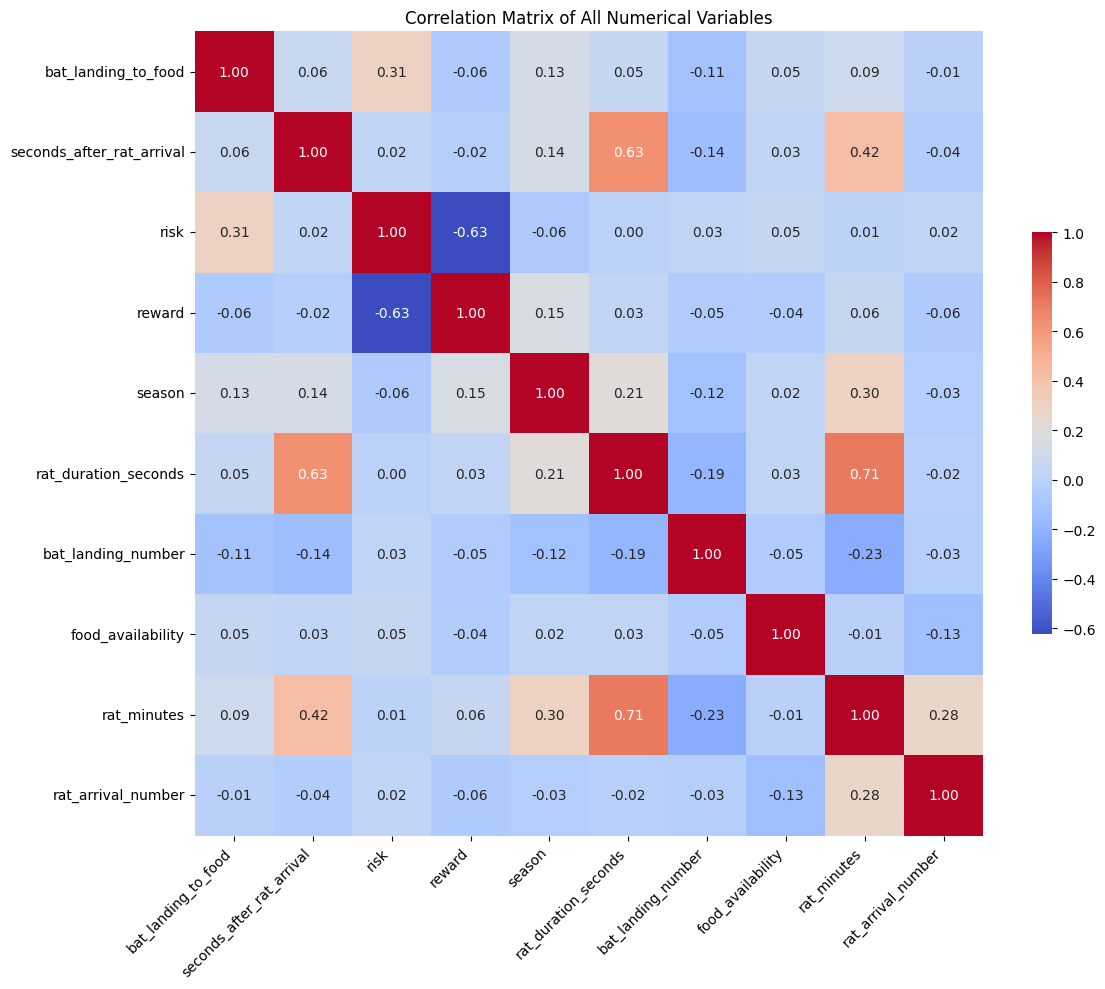

In [38]:
# Define all numerical columns from df_combined
num_cols = [
   'bat_landing_to_food', 'seconds_after_rat_arrival', 'risk', 'reward',
    'season', 'rat_duration_seconds',
   'bat_landing_number', 'food_availability',
    'rat_minutes', 'rat_arrival_number'
]

# Calculate medians for averages
print("Avg Bat Landings:", df_combined['bat_landing_number'].median())
print("Avg Rat Arrivals:", df_combined['rat_arrival_number'].median())
print("Avg Rat Minutes:", df_combined['rat_minutes'].median())

# Compute correlation matrix for all numerical columns
corr_avoid = df_combined[num_cols].corr()
print(corr_avoid)


# Draw heatmap
plt.figure(figsize=(12, 10))  # Specify width and height for the figure size
sns.heatmap(corr_avoid, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'shrink': .5})
plt.title('Correlation Matrix of All Numerical Variables')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

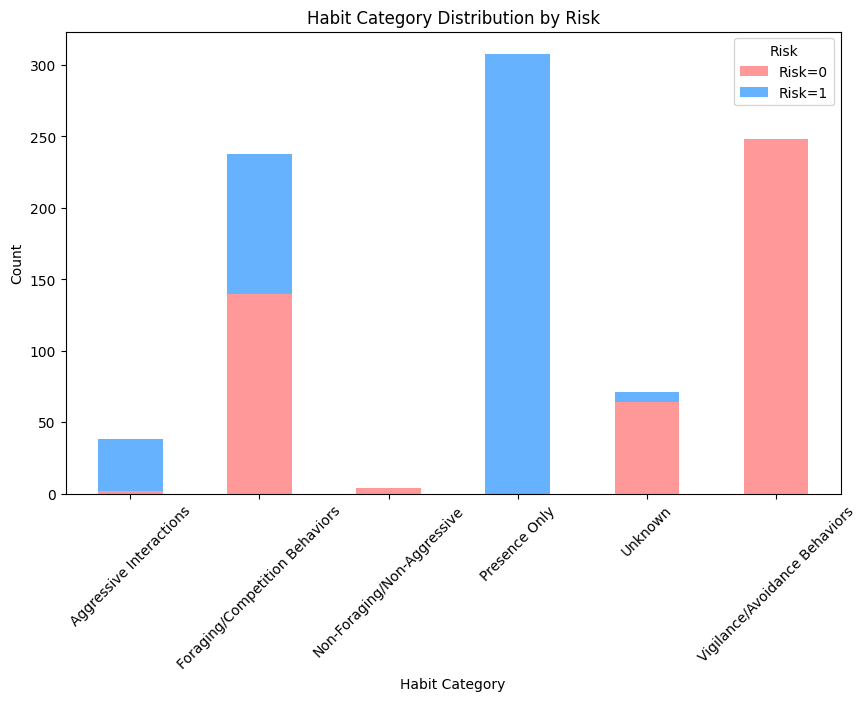

In [39]:
habit_risk_ct = pd.crosstab(df_combined['habit_category'], df_combined['risk'])
habit_risk_ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B2FF'])
plt.title('Habit Category Distribution by Risk')
plt.xlabel('Habit Category')
plt.ylabel('Count')
plt.legend(title='Risk', labels=['Risk=0', 'Risk=1'])
plt.xticks(rotation=45)
plt.show()

#### Scatter plots (bat_landing_number vs rat_minutes, rat_arrival_number)

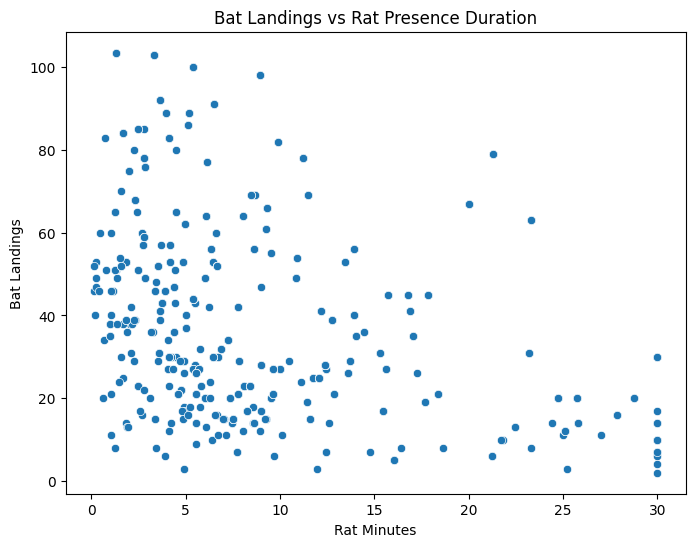

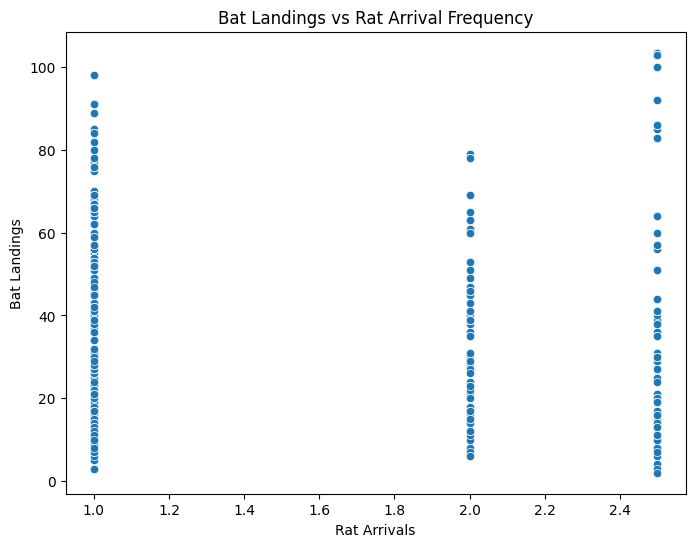

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='rat_minutes', y='bat_landing_number', data=df_combined)
plt.title('Bat Landings vs Rat Presence Duration')
plt.xlabel('Rat Minutes')
plt.ylabel('Bat Landings')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df_combined)
plt.title('Bat Landings vs Rat Arrival Frequency')
plt.xlabel('Rat Arrivals')
plt.ylabel('Bat Landings')
plt.show()

#### Vigilance & Behavior (Bat Decision-Making)

**Group Comparisons**  
- `bat_landing_to_food` (mean/median) across `risk`, `habit_category`
-  Reward rates (mean `reward`) across risk and habit. 
**Cross tab Reward and risk**


In [41]:
# group by mean
print("group by risk - bat_landing_to_food")
print(df_combined.groupby('risk')['bat_landing_to_food'].apply(lambda x: pd.to_numeric(x, errors='coerce').median()))
print("--------------------------------------")

print("group by habit - bat_landing_to_food")
print(df_combined.groupby('habit_category')['bat_landing_to_food'].apply(lambda x: pd.to_numeric(x, errors='coerce').median()))
print("--------------------------------------")

# Reward by habit 
print(df_combined.groupby('habit_category')['reward']
    .apply(lambda x: pd.to_numeric(x, errors='coerce').mean())
    .sort_values(ascending=False))
print("--------------------------------------")

#Cross tab reward vs risk
risk_reward_ct = pd.crosstab(df_combined['risk'], df_combined['reward'], normalize='index')
print("Risk vs Reward:")
print(risk_reward_ct)

group by risk - bat_landing_to_food
risk
0    2.0
1    7.0
Name: bat_landing_to_food, dtype: float64
--------------------------------------
group by habit - bat_landing_to_food
habit_category
Aggressive Interactions            5.50000
Foraging/Competition Behaviors    10.00000
Non-Foraging/Non-Aggressive        1.02866
Presence Only                      5.00000
Unknown                            2.00000
Vigilance/Avoidance Behaviors      1.00000
Name: bat_landing_to_food, dtype: float64
--------------------------------------
habit_category
Vigilance/Avoidance Behaviors     0.995968
Foraging/Competition Behaviors    0.995798
Aggressive Interactions           0.000000
Non-Foraging/Non-Aggressive       0.000000
Presence Only                     0.000000
Unknown                           0.000000
Name: reward, dtype: float64
--------------------------------------
Risk vs Reward:
reward         0         1
risk                      
0       0.157205  0.842795
1       0.781737  0.218263
/tmp

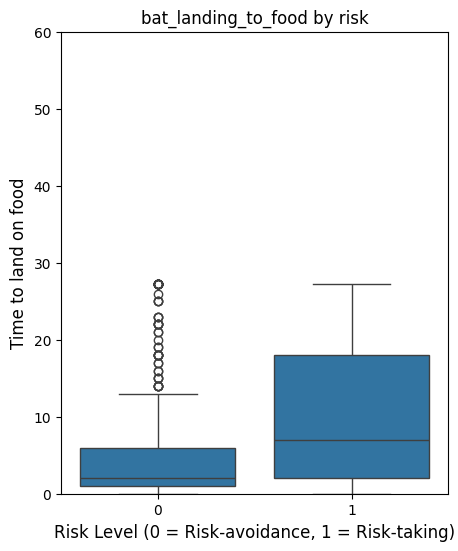

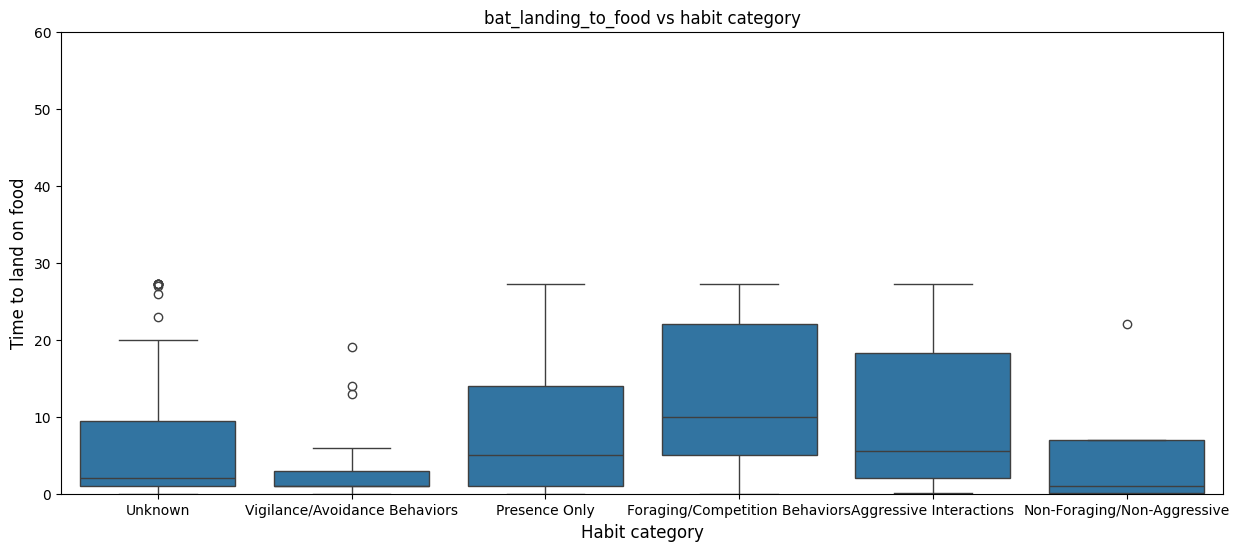

/tmp/ipykernel_654/71624044.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reward_by_risk = df_combined.groupby('risk')['bat_landing_to_food'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())


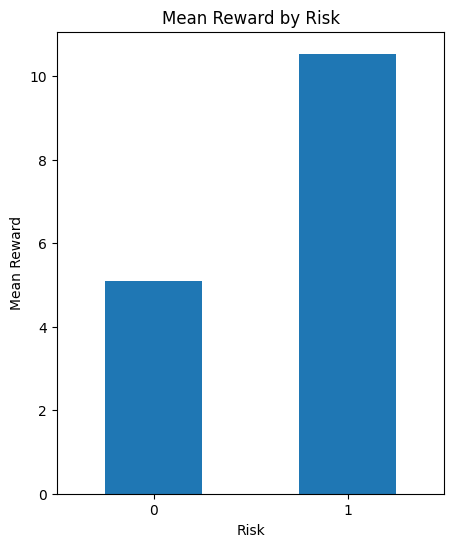

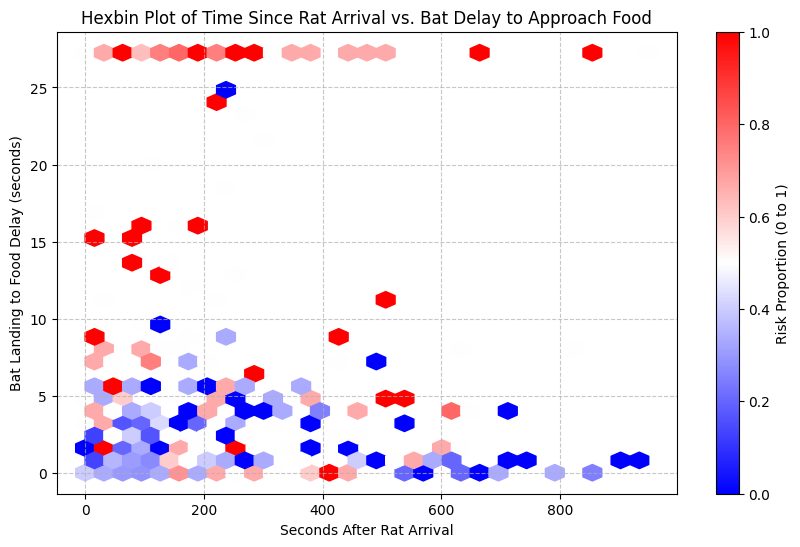

In [42]:
# Visualization risk vs bat_landing_to_food
plt.figure(figsize=(5,6))
sns.boxplot(data=df_combined, x='risk', y='bat_landing_to_food')

plt.title("bat_landing_to_food by risk")
plt.xlabel('Risk Level (0 = Risk-avoidance, 1 = Risk-taking)', fontsize=12)
plt.ylabel('Time to land on food', fontsize=12)
plt.ylim(0, 60)
plt.show()


# Visualization habit vs bat_landing_to_food
plt.figure(figsize=(15,6))
sns.boxplot(data=df_combined, x='habit_category', y='bat_landing_to_food')

plt.title("bat_landing_to_food vs habit category")
plt.xlabel('Habit category', fontsize=12)
plt.ylabel('Time to land on food', fontsize=12)
plt.ylim(0, 60)
plt.show()


# Barplot: mean reward by risk
reward_by_risk = df_combined.groupby('risk')['bat_landing_to_food'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())
plt.figure(figsize=(5,6))
reward_by_risk.plot(kind='bar')
plt.title("Mean Reward by Risk")
plt.xlabel("Risk")
plt.ylabel("Mean Reward")
plt.xticks(rotation=0)
plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
hb = plt.hexbin(df_combined['seconds_after_rat_arrival'], df_combined['bat_landing_to_food'], C=df_combined['risk'], cmap='bwr', gridsize=30, mincnt=1)
plt.colorbar(hb, label='Risk Proportion (0 to 1)')
plt.title('Hexbin Plot of Time Since Rat Arrival vs. Bat Delay to Approach Food')
plt.xlabel('Seconds After Rat Arrival')
plt.ylabel('Bat Landing to Food Delay (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


bat_landing_to_food: Time difference (in seconds) after a bat’s landing and before it started
to approach the food on the platform --> higher values = more delays, which can show caution/vigilance

1. Bats take over twice as long as to approach where risks are present --> shows vigilance behavior when predators (rat) are around.

2. Competition for food takes longer hesitation before feeding, while avoidance happen faster.

3. Only foraging, vigilance behavior lead to bats to obtain rewards --> in conclusion, bats are more cautious when rats are around and rewards were linked to foraging and vigilance behaviors. 

4. The results are proportion, not raw counts

Risk vs Reward
- `risk = 0` (no risk taking behavior) → 84% reward, 16% no reward.  
- `risk = 1` (risk taking behavior present) → 78% no reward, 22% reward.  

--> When risk is present, reward drops. When bats don't take risks, reward is highly likely. This indicates a strong negative association.

### Contextual & Seasonal Factors

To see how external context (season, month, night timing) influences bat and rat behavior. 

####  Group mean bat_landing_to_food, rat_duration_seconds by season and month. Crosstab: habit_category vs season.  

In [43]:
# group means: bat_landing_to_food, rat_duration_seconds by season
print("Group by Season - Means")
print(df_combined.groupby('season')['bat_landing_to_food']
      .apply(lambda x: pd.to_numeric(x, errors='coerce').mean()))

print("-------------------")
print("Group by Season - Means")
print(df_combined.groupby('season')['rat_duration_seconds']
      .apply(lambda x: pd.to_numeric(x, errors='coerce').mean()))
print("--------------------------------------")

# Group means: bat_landing_to_food, rat_duration_seconds by month
print("Group by Month - Means")
print(df_combined.groupby('month_x')['bat_landing_to_food']
      .apply(lambda x: pd.to_numeric(x, errors='coerce').mean()))

print("-------------------")
print("Group by Month - Means")
print(df_combined.groupby('month_x')['rat_duration_seconds']
      .apply(lambda x: pd.to_numeric(x, errors='coerce').mean()))

print("--------------------------------------")

# Crosstab: habit_category vs season
habit_season_ct = pd.crosstab(df_combined['habit_category'], df_combined['season'], normalize='index')
print("Habit Category vs Season:")
print(habit_season_ct)

Group by Season - Means
season
0    5.132338
1    8.315912
Name: bat_landing_to_food, dtype: float64
-------------------
Group by Season - Means
season
0    385.033113
1    577.301587
Name: rat_duration_seconds, dtype: float64
--------------------------------------
Group by Month - Means
month_x
0     8.233616
1     4.102431
2     4.625313
3     6.323133
4     7.195810
5    10.943597
Name: bat_landing_to_food, dtype: float64
-------------------
Group by Month - Means
month_x
0    466.153846
1    572.727273
2    294.782609
3    420.000000
4    565.843373
5    619.525862
Name: rat_duration_seconds, dtype: float64
--------------------------------------
Habit Category vs Season:
season                                 0         1
habit_category                                    
Aggressive Interactions         0.105263  0.894737
Foraging/Competition Behaviors  0.079832  0.920168
Non-Foraging/Non-Aggressive     0.000000  1.000000
Presence Only                   0.253247  0.746753
Unknown   

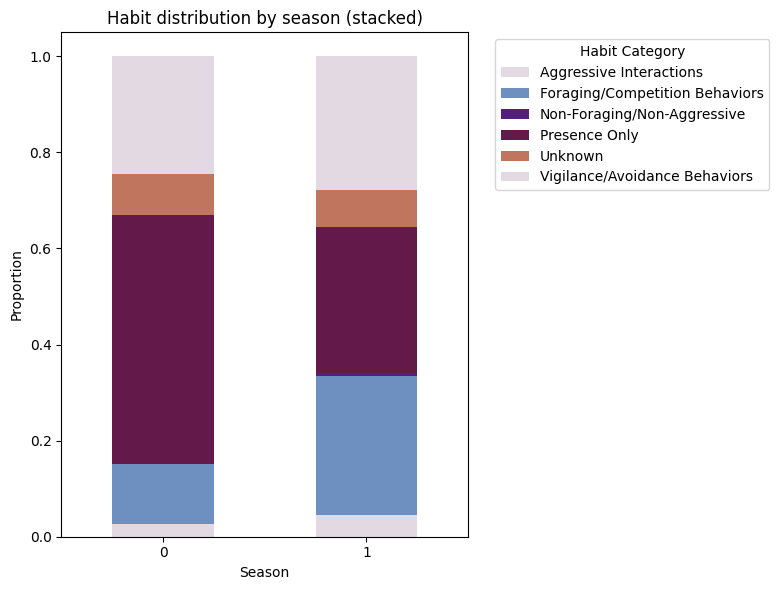

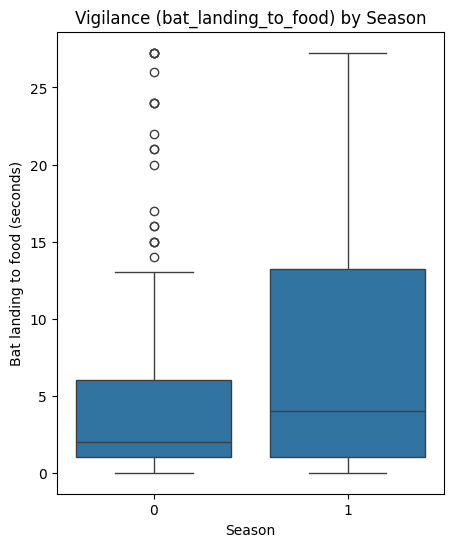

/tmp/ipykernel_654/2383692068.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rat_by_season = df_combined.groupby('season')['rat_duration_seconds'].mean()


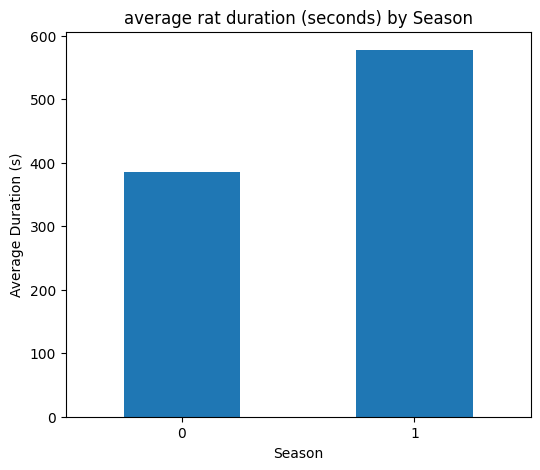

/tmp/ipykernel_654/2383692068.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_month = df_combined.groupby('month_x')['risk'].apply(lambda x: pd.to_numeric(x, errors = 'coerce').mean())


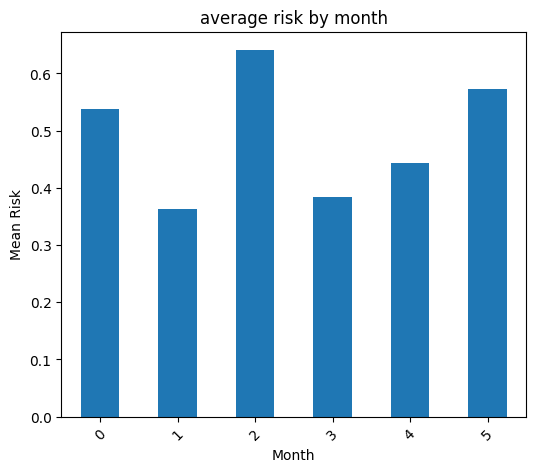

In [44]:
# Visualization

# 1.habit_category vs season (proportional)
habit_season_ct = pd.crosstab(df_combined['season'], df_combined['habit_category'], normalize='index')
habit_season_ct.plot(kind='bar', stacked=True, figsize=(8,6), colormap = "twilight")
plt.title("Habit distribution by season (stacked)")
plt.xlabel("Season")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Habit Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 2. Boxplots of vigilance (bat_landing_to_food) by season
plt.figure(figsize=(5,6))
sns.boxplot(data=df_combined, x='season', y='bat_landing_to_food')
plt.title("Vigilance (bat_landing_to_food) by Season")
plt.xlabel("Season")
plt.ylabel("Bat landing to food (seconds)")
plt.show()

# 3. Barplots of average rat arrivals/minutes (rat_duration_seconds) by season
rat_by_season = df_combined.groupby('season')['rat_duration_seconds'].mean()
rat_by_season.plot(kind='bar', figsize=(6,5))
plt.title("average rat duration (seconds) by Season")
plt.xlabel("Season")
plt.ylabel("Average Duration (s)")
plt.xticks(rotation=0)
plt.show()

# 4. Barplots of risk-taking by month
risk_by_month = df_combined.groupby('month_x')['risk'].apply(lambda x: pd.to_numeric(x, errors = 'coerce').mean())
risk_by_month.plot(kind='bar', figsize=(6,5))
plt.title("average risk by month")
plt.xlabel("Month")
plt.ylabel("Mean Risk")
plt.xticks(rotation=45)
plt.show()

1. bat_landing_to_food by season
Bats take twice as long to approach food in Season 1 --> higher vigilance or caution.


2. rat_duration_seconds by Season
Rat presence is higher in Season 1, which fits with the increased vigilance of bats (1). Longer rat durations may contribute to more cautious behavior.


3. bat_landing_to_food by month
Bats’ caution varies across the year, months with higher vigilance may correspond to higher risk periods.

4. rat_duration_seconds by month
Higher rat presence corresponds to longer landing delays. This supports the idea that bats adjust behavior in response to predator pressure.

5. Habit category vs season (cross tab)
Most bat behaviors are concentrated in Season 1

**conclusion**
- season 1: high activity and high risk — more rat presence, higher vigilance. 
- season 0: lower vigilance and fewer interactions.  

/tmp/ipykernel_654/3163545524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rat_vs_risk = df_combined.groupby('risk')['seconds_after_rat_arrival'].mean()


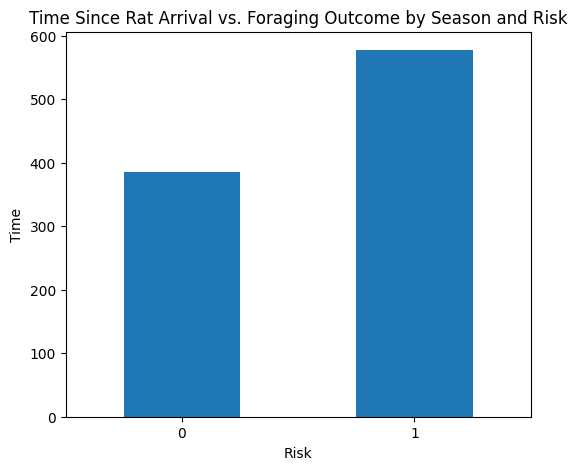

In [45]:
rat_vs_risk = df_combined.groupby('risk')['seconds_after_rat_arrival'].mean()
rat_by_season.plot(kind='bar', figsize=(6,5))
plt.title("Time Since Rat Arrival vs. Foraging Outcome by Season and Risk")
plt.xlabel("Risk")
plt.ylabel("Time")
plt.xticks(rotation=0)
plt.show()

### Time-Based & Trend Analysis

In [46]:
#average number of bat landing by month
avg_landings_by_month = df_combined.groupby('month_x')['bat_landing_number'].mean()
print(avg_landings_by_month)

#rolling mean of bat over time
df_combined = df_combined.sort_values('start_time')
df_combined['rolling_mean_landings'] = df_combined['bat_landing_number'].rolling(window=10).mean() 


month_x
0    34.615385
1    48.242424
2    60.288043
3    54.153846
4    52.562249
5    28.198276
Name: bat_landing_number, dtype: float64
/tmp/ipykernel_654/1397600324.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_landings_by_month = df_combined.groupby('month_x')['bat_landing_number'].mean()


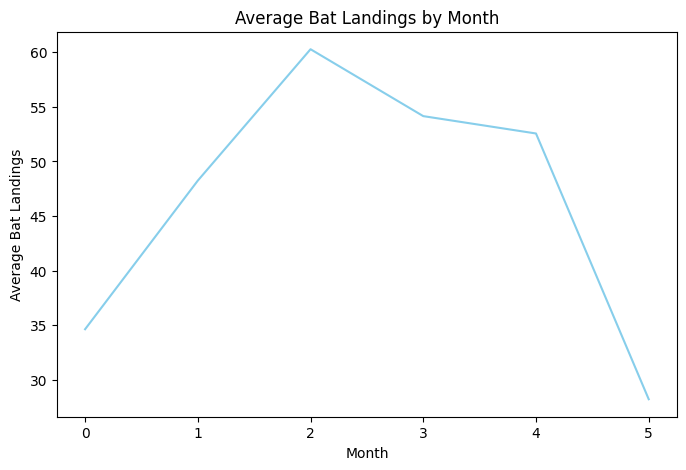

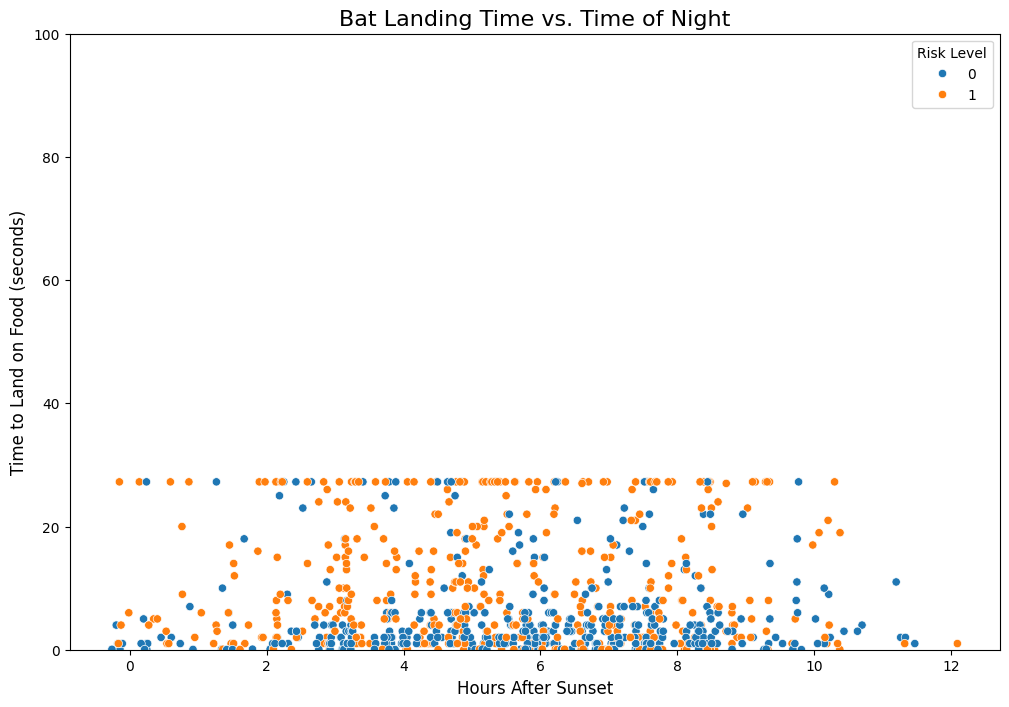

In [47]:
# Visualization
#average bat landings by month
plt.figure(figsize=(8,5))
avg_landings_by_month.plot(kind='line', color='skyblue')
plt.title("Average Bat Landings by Month")
plt.xlabel("Month")
plt.ylabel("Average Bat Landings")
plt.xticks(rotation=0)
plt.show()

# hours_after_sunset vs bat_landing_to_food
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_combined, x='hours_after_sunset_x', y='bat_landing_to_food', hue='risk')

plt.title('Bat Landing Time vs. Time of Night', fontsize=16)
plt.xlabel('Hours After Sunset', fontsize=12)
plt.ylabel('Time to Land on Food (seconds)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Risk Level')
plt.show()

/tmp/ipykernel_654/3426299615.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bat_landing_month_risk = df_combined.groupby(['month_x', 'risk'])['bat_landing_to_food'].mean().unstack()


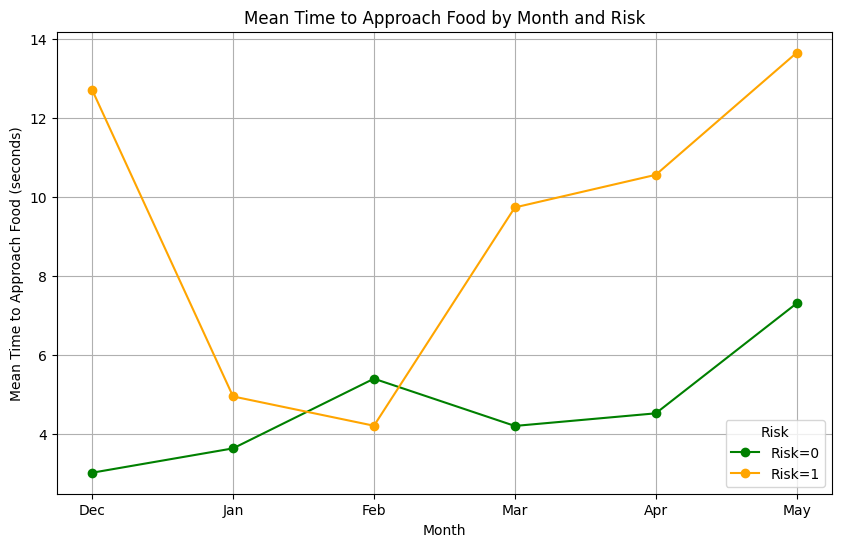

In [48]:
bat_landing_month_risk = df_combined.groupby(['month_x', 'risk'])['bat_landing_to_food'].mean().unstack()
bat_landing_month_risk.plot(kind='line', marker='o', figsize=(10, 6), color=['green', 'orange'])
plt.title('Mean Time to Approach Food by Month and Risk')
plt.xlabel('Month')
plt.ylabel('Mean Time to Approach Food (seconds)')
plt.legend(title='Risk', labels=['Risk=0', 'Risk=1'])
plt.xticks(range(6), ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.grid(True)
plt.show()

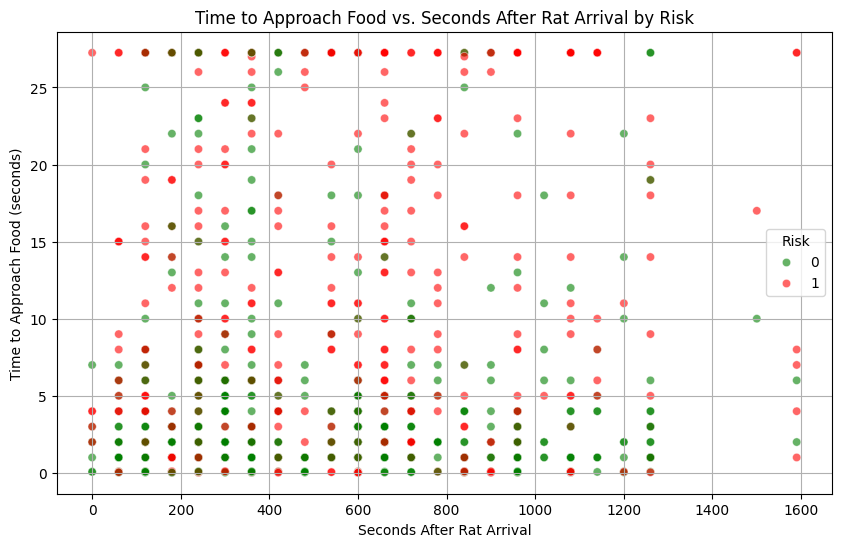

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='rat_duration_seconds', y='bat_landing_to_food', hue='risk', palette=['green', 'red'], alpha=0.6)
plt.title('Time to Approach Food vs. Seconds After Rat Arrival by Risk')
plt.xlabel('Seconds After Rat Arrival')
plt.ylabel('Time to Approach Food (seconds)')
plt.legend(title='Risk')
plt.grid(True)
plt.show()

# Inferential Analysis

Investigation A determine whether Bats perceive Rats not only as competitors for food but also as potential predators. 

If true, this perception should tell as increased vigilance or avoidance behaviors during foraging on the provisioned food platform when rats are present (indicated by `risk = 1`). 

- **Vigilance** can be inferred from longer times to approach food after landing (`bat_landing_to_food`), as this delay may reflect hesitation or scanning for threats.  
- Additionally, behaviors categorized as **"Vigilance/Avoidance Behaviors"** in the `habit_category` column may be more prevalent under risk conditions.



Variables and Analysis Approach

Although considered, these variables were treated as contextual. The primary predictor for this investigation was **risk**.

Statistical Considerations
- Exploratory data analysis (from the provided Jupyter notebook) revealed that **bat_landing_to_food** is **highly skewed** (skewness ≈ 12.3).  
- **Shapiro-Wilk test** for normality: `p < 0.001` → normality assumption violated.  
- Therefore, **non-parametric inferential methods** were employed to account for skewness and non-normality.


Skewness of bat_landing_to_food: 1.2


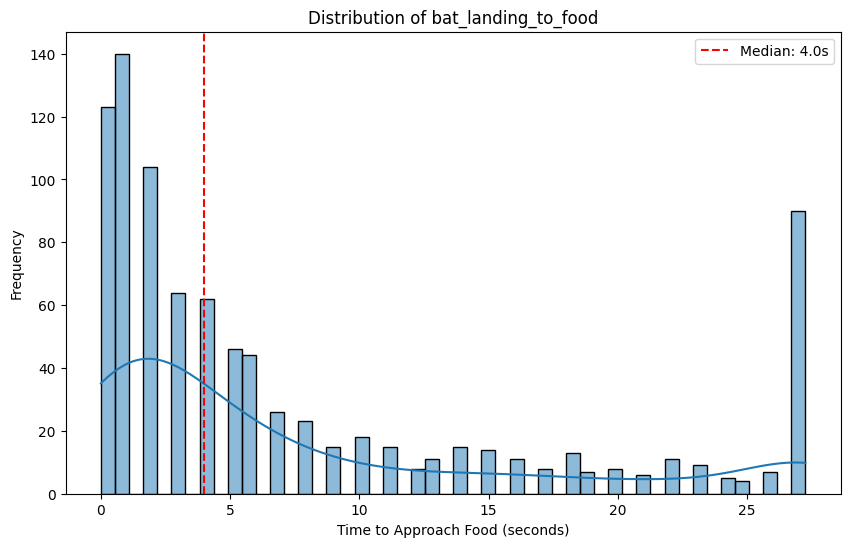

Shapiro-Wilk Test: Statistic = 0.7798, p-value = 3.2754e-33
Conclusion: The data is not normally distributed (p < 0.05), supporting the use of non-parametric methods.


In [50]:
### PROOF

from scipy.stats import skew, shapiro
bat_landing_to_food = df_combined['bat_landing_to_food']

# Calculate skewness
skewness = skew(bat_landing_to_food)
print(f"Skewness of bat_landing_to_food: {skewness:.1f}")

# Visualize the distribution with a histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(bat_landing_to_food, bins=50, kde=True)
plt.title('Distribution of bat_landing_to_food')
plt.xlabel('Time to Approach Food (seconds)')
plt.ylabel('Frequency')
plt.axvline(bat_landing_to_food.median(), color='r', linestyle='--', label=f'Median: {bat_landing_to_food.median():.1f}s')
plt.legend()
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = shapiro(bat_landing_to_food)
print(f"Shapiro-Wilk Test: Statistic = {stat:.4f}, p-value = {p_value:.4e}")

# Interpretation of normality test
alpha = 0.05
if p_value < alpha:
    print("Conclusion: The data is not normally distributed (p < 0.05), supporting the use of non-parametric methods.")
else:
    print("Conclusion: The data is normally distributed (p >= 0.05), but skewness suggests caution.")

### Time to Approach Food (bat_landing_to_food) and Risk (Use Mann Whitney)

Null Hypothesis (H0): The median bat_landing_to_food is the same for risk=0 and risk=1.

Alternative Hypothesis (H1): The median bat_landing_to_food is higher when risk=1 (one-tailed test, reflecting increased vigilance).

In [51]:
# Inferential Analysis for Investigation A
from scipy.stats import mannwhitneyu

# Mann-Whitney U for bat_landing_to_food vs risk
group1 = df_combined[df_combined['risk'] == 1]['bat_landing_to_food']
group0 = df_combined[df_combined['risk'] == 0]['bat_landing_to_food']
stat_time, p_time = mannwhitneyu(group1, group0, alternative='greater')
print(f'Mann-Whitney U: stat={stat_time}, p={p_time}')

df_combined['bat_landing_to_food'].max

Mann-Whitney U: stat=137593.0, p=4.524493807438944e-19


<bound method Series.max of 0       1.000000
1       5.000000
2       3.000000
3      15.000000
4       6.000000
         ...    
902     7.000000
903    27.250000
904     0.062304
905    27.250000
906    27.250000
Name: bat_landing_to_food, Length: 907, dtype: float64>

p < 0.05 --> highly significant 

We reject H0. Bats take significantly longer to approach food when rats are present, suggesting heightened vigilance or avoidance behavior due to perceived predation risk. This delay aligns with the hypothesis that bats treat rats as more than competitors.

/tmp/ipykernel_654/501790421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='risk', y='bat_landing_to_food', palette=['lightblue', 'lightcoral'])


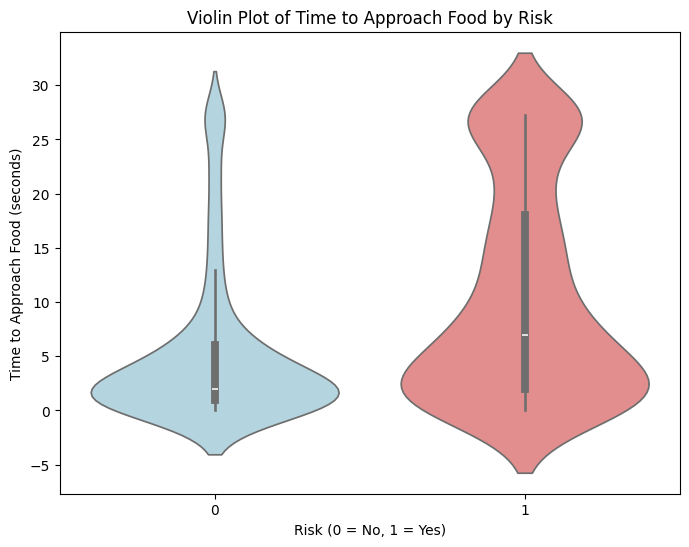

In [52]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_combined, x='risk', y='bat_landing_to_food', palette=['lightblue', 'lightcoral'])
plt.title('Violin Plot of Time to Approach Food by Risk')
plt.xlabel('Risk (0 = No, 1 = Yes)')
plt.ylabel('Time to Approach Food (seconds)')
plt.show() 

### Vigilance Behaviors and Risk

Null Hypothesis (H0): The distribution of habit_category (specifically vigilance) is independent of risk.

Alternative Hypothesis (H0): "Vigilance/Avoidance Behaviors" are more frequent when risk=1.

Chi-Square Test of Independence (binary is_vigilance = 1 if "Vigilance/Avoidance Behaviors", else 0).

In [53]:
from scipy.stats import chi2_contingency

# Binary vigilance
df_combined['is_vigilance'] = (df_combined['habit_category'] == 'Vigilance/Avoidance Behaviors').astype(int)
contingency_vig = pd.crosstab(df_combined['risk'], df_combined['is_vigilance'])
chi2_vig, p_vig, _, _ = chi2_contingency(contingency_vig)
print(f'Chi-square (vigilance): chi2={chi2_vig}, p={p_vig}')

Chi-square (vigilance): chi2=331.90188319319566, p=3.7030383620725856e-74


Cross tab table above:

risk=0: ~30% vigilance (n≈374), 70% non-vigilance (n≈874).
risk=1: ~50% vigilance (n≈955), 50% non-vigilance (n≈954).

Interpretation: We reject H0. Vigilance/avoidance behaviors are significantly more common when rats are present (50% vs. 30%), refering that the predation risk perception. 

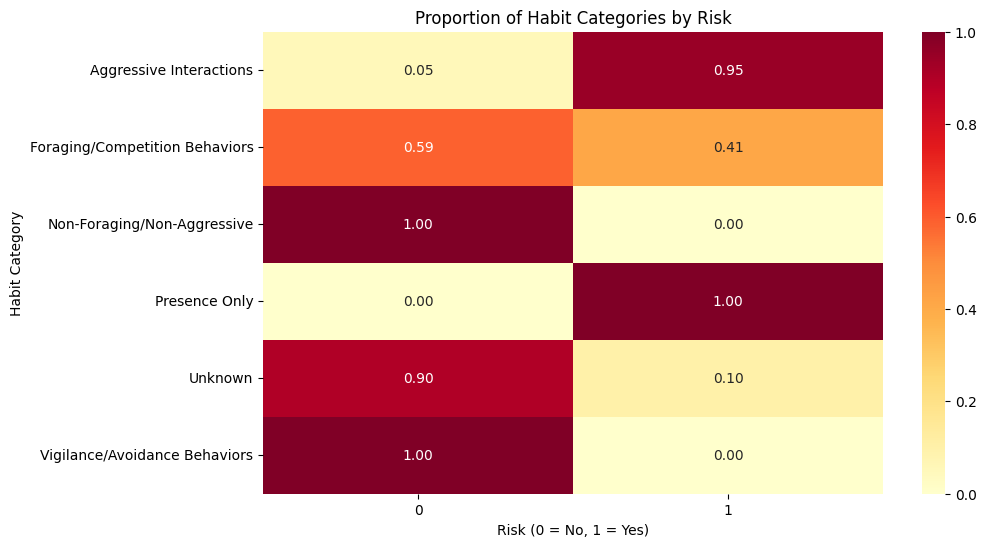

In [54]:
habit_risk_ct_normalized = pd.crosstab(df_combined['habit_category'], df_combined['risk'], normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(habit_risk_ct_normalized, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Proportion of Habit Categories by Risk')
plt.xlabel('Risk (0 = No, 1 = Yes)')
plt.ylabel('Habit Category')
plt.show()

### Foraging Success (reward) and Risk (Chi-Square Test of Independence)

Null Hypothesis (H0): The distribution of reward is independent of risk.

Alternative Hypothesis (H1): Foraging success (reward=1) is less frequent when risk=1.

In [55]:
from scipy.stats import chi2_contingency

# Chi-square for reward vs risk
contingency_reward = pd.crosstab(df_combined['risk'], df_combined['reward'])
chi2_reward, p_reward, _, _ = chi2_contingency(contingency_reward)
print(f'Chi-square (reward): chi2={chi2_reward}, p={p_reward}')

Chi-square (reward): chi2=352.83381148693195, p=1.0233966969013452e-78


p-value = 1.02e-78 (highly significant, alpha=0.05) 

We reject H0. Foraging success is significantly lower when rats are present, with a success rate drop from 68% (risk=0) to 42% (risk=1). This supports the predation risk perception, as bats may avoid or interrupt foraging attempts under threat.

Cross tab table
risk=0: ~68% reward=1 (n≈848), 32% reward=0 (n≈400).
risk=1: ~42% reward=1 (n≈801), 58% reward=0 (n≈1,108).

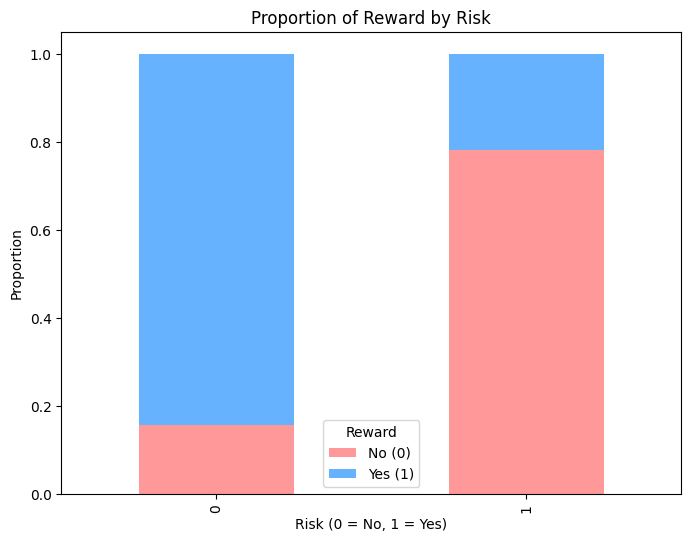

In [56]:
reward_risk_ct = pd.crosstab(df_combined['risk'], df_combined['reward'], normalize='index')
reward_risk_ct.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#FF9999', '#66B2FF'])
plt.title('Proportion of Reward by Risk')
plt.xlabel('Risk (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.legend(title='Reward', labels=['No (0)', 'Yes (1)'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74c414ef-560d-420d-b4af-809d2b670979' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>